In [1]:
import pickle
import numpy as np
from transformations import euler_from_matrix
import matplotlib.pyplot as plt

In [2]:
robot_state_data_pickle_file_path = '/home/sony/logs/angled_slice.pkl'

In [3]:
state_dict = pickle.load( open( robot_state_data_pickle_file_path, "rb" ) )

In [4]:
def process_cartesian_trajectories(trajectory):
    
    num_trajectory_points = trajectory.shape[0]
    cartesian_trajectory = np.zeros((num_trajectory_points,6))
    cartesian_trajectory[:,:3] = trajectory[:,12:15]
    
    transformation_trajectory_1 = trajectory[:,:4].reshape((-1,4,1))
    transformation_trajectory_2 = trajectory[:,4:8].reshape((-1,4,1))
    transformation_trajectory_3 = trajectory[:,8:12].reshape((-1,4,1))
    transformation_trajectory_4 = trajectory[:,12:].reshape((-1,4,1))
    transformation_trajectory = np.concatenate([transformation_trajectory_1, transformation_trajectory_2,
                                                transformation_trajectory_3, transformation_trajectory_4], axis=2)
    
    for i in range(num_trajectory_points):
        cartesian_trajectory[i,3:] = euler_from_matrix(transformation_trajectory[i,:,:], axes='szyx')
        cartesian_trajectory[i,3:] *= -1
    
    return cartesian_trajectory

In [5]:
def visualize_cartesian_position_trajectories(trajectory_times, trajectory, labels=['x','y','z']):
    
    for i in range(3):
        plt.plot(trajectory_times, trajectory[:,i], label=labels[i])
    plt.legend()
    plt.title('Cartesian Position')
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m)')
    plt.show()
    
def visualize_cartesian_orientation_trajectories(trajectory_times, trajectory, labels=['rx','ry','rz']):
        
    for i in range(3):
        plt.plot(trajectory_times, trajectory[:,i+3], label=labels[i])
    plt.legend()
    plt.title('Cartesian Orientation')
    plt.xlabel('Time (s)')
    plt.ylabel('Angle (rad)')
    plt.show()
    
def visualize_cartesian_trajectories(trajectory_times, trajectory, labels=['x','y','z','rx','ry','rz']):
    
    for i in range(6):
        if labels is None:
            plt.plot(trajectory_times, trajectory[:,i])
        else:
            plt.plot(trajectory_times, trajectory[:,i], label=labels[i])
    if labels is not None:
        plt.legend()
    plt.title('Cartesian Pose')
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m) and Angle (rad)')
    plt.show()

In [6]:
def visualize_relative_cartesian_position_trajectories(trajectory_times, trajectory, labels=['x','y','z']):
    
    for i in range(3):
        plt.plot(trajectory_times, trajectory[:,i] - trajectory[0,i], label=labels[i])
    plt.legend()
    plt.title('Relative Cartesian Position')
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m)')
    plt.show()

def visualize_relative_cartesian_orientation_trajectories(trajectory_times, trajectory, labels=['rx','ry','rz']):
    
    for i in range(3):
        plt.plot(trajectory_times, trajectory[:,i+3] - trajectory[0,i+3], label=labels[i])
    plt.legend()
    plt.title('Relative Cartesian Orientation')
    plt.xlabel('Time (s)')
    plt.ylabel('Angle (rad)')
    plt.show()
    
def visualize_relative_cartesian_trajectories(trajectory_times, trajectory, labels=['x','y','z','rx','ry','rz']):
    
    for i in range(6):
        if labels is None:
            plt.plot(trajectory_times, trajectory[:,i] - trajectory[0,i])
        else:
            plt.plot(trajectory_times, trajectory[:,i] - trajectory[0,i], label=labels[i])
    if labels is not None:
        plt.legend()
    plt.title('Relative Cartesian Pose')
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m) and Angle (rad)')
    plt.show()

In [7]:
def visualize_joint_trajectories(trajectory_times, trajectory, labels=['1','2','3','4','5','6','7']):
    
    for i in range(len(labels)):
        plt.plot(trajectory_times, trajectory[:,i], label=labels[i])
    plt.legend()
    plt.title('Joint Position')
    plt.xlabel('Time (s)')
    plt.ylabel('Position (rad)')
    plt.show()
    
def visualize_relative_joint_trajectories(trajectory_times, trajectory, labels=['1','2','3','4','5','6','7']):
    
    for i in range(len(labels)):
        plt.plot(trajectory_times, trajectory[:,i] - trajectory[0,i], label=labels[i])
    plt.legend()
    plt.title('Relative Joint Position')
    plt.xlabel('Time (s)')
    plt.ylabel('Position (rad)')
    plt.show()

ForceTorqueSkill


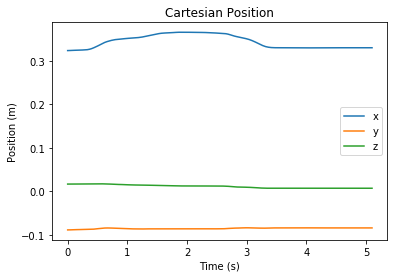

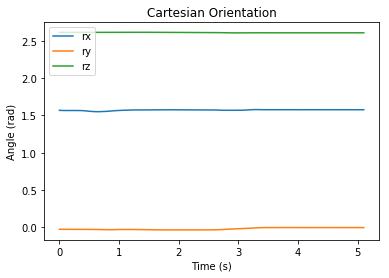

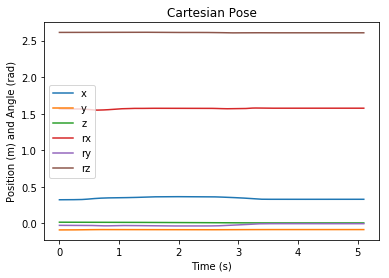

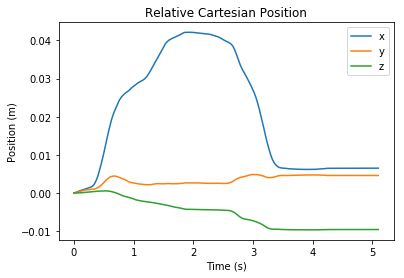

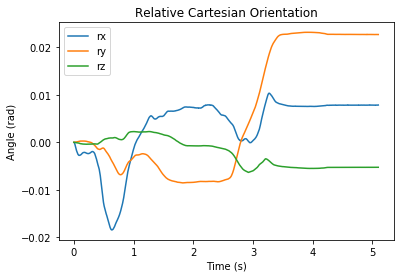

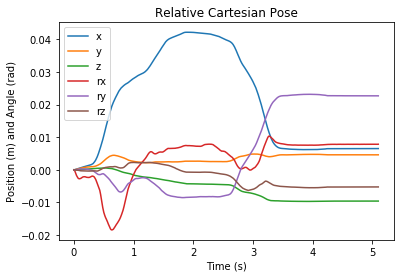

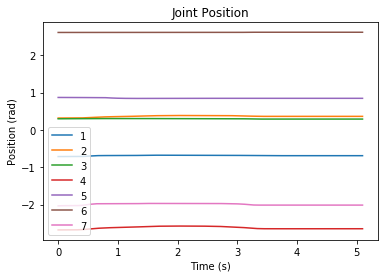

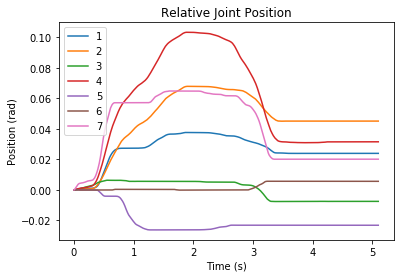

In [8]:
for key in state_dict.keys():
    skill_dict = state_dict[key]
    print(skill_dict["skill_desc"])
    
    if skill_dict["skill_desc"] == "ForceTorqueSkill":
        skill_state_dict = skill_dict["skill_state_dict"]
        cartesian_trajectory = process_cartesian_trajectories(skill_state_dict['O_T_EE'])
        visualize_cartesian_position_trajectories(skill_state_dict['time_since_skill_started'], cartesian_trajectory)
        visualize_cartesian_orientation_trajectories(skill_state_dict['time_since_skill_started'], cartesian_trajectory)
        visualize_cartesian_trajectories(skill_state_dict['time_since_skill_started'], cartesian_trajectory)
        visualize_relative_cartesian_position_trajectories(skill_state_dict['time_since_skill_started'], cartesian_trajectory)
        visualize_relative_cartesian_orientation_trajectories(skill_state_dict['time_since_skill_started'], cartesian_trajectory)
        visualize_relative_cartesian_trajectories(skill_state_dict['time_since_skill_started'], cartesian_trajectory)
        visualize_joint_trajectories(skill_state_dict['time_since_skill_started'], skill_state_dict['q'])
        visualize_relative_joint_trajectories(skill_state_dict['time_since_skill_started'], skill_state_dict['q'])